In [1]:
import pandas as pd 
from pandas import Series
import numpy as np 
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.arima_model import ARMA
from statsmodels.graphics.api import qqplot  
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import durbin_watson

import pmdarima as pm
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import nsdiffs
from statsmodels.tsa.seasonal import seasonal_decompose 
from sklearn import datasets

# Ignore harmless warnings 
import warnings 
warnings.filterwarnings("ignore") 

In [2]:
#Importing data
Beijing = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/BeijingPM20100101_20151231.csv") #52584 #19062
Shanghai = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/ShanghaiPM20100101_20151231.csv") #21436
Chengdu = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/ChengduPM20100101_20151231.csv") #21074
Shenyang = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/ShenyangPM20100101_20151231.csv") #19038
Guangzhou = pd.read_csv("/Users/kayinho/Downloads/FiveCitiePMData/GuangzhouPM20100101_20151231.csv") #20074

In [3]:
#Delet non-useful data
Beijing.drop(['PM_Dongsi', 'PM_Dongsihuan', 'PM_Nongzhanguan', 'season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)
Shanghai.drop(['PM_Jingan', 'season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)
Chengdu.drop(['PM_Caotangsi', 'PM_Shahepu','season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)
Shenyang.drop(['PM_Taiyuanjie', 'PM_Xiaoheyan','season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)
Guangzhou.drop(['PM_City Station', 'PM_5th Middle School','season', 'precipitation', 'Iprec', 'cbwd'], 
               axis=1,
              inplace=True)

In [4]:
city = [Beijing, Shanghai, Chengdu, Shenyang, Guangzhou]
for i in city:
    # remove na
    i.dropna(axis=0, how="any",inplace=True)
    # from datetime import datetime
    i['Time'] = pd.to_datetime(i['year'].map(str) +"/"+ i['month'].map(str) +"/"+ i['day'].map(str)+" "+i['hour'].map(str)+":00:00")


In [5]:
Beijing.dropna(axis=0, how="any", inplace=True)
Beijing['Time'] = pd.to_datetime(Beijing['year'].map(str) +"/"+ Beijing['month'].map(str) +"/"+ Beijing['day'].map(str)+" "+Beijing['hour'].map(str)+":00:00")

Shanghai.dropna(axis=0, how="any", inplace=True)
Shanghai['Time'] = pd.to_datetime(Shanghai['year'].map(str) +"/"+ Shanghai['month'].map(str) +"/"+ Shanghai['day'].map(str)+" "+Shanghai['hour'].map(str)+":00:00")

Chengdu.dropna(axis=0, how="any", inplace=True)
Chengdu['Time'] = pd.to_datetime(Chengdu['year'].map(str) +"/"+ Chengdu['month'].map(str) +"/"+ Chengdu['day'].map(str)+" "+Chengdu['hour'].map(str)+":00:00")

Shenyang.dropna(axis=0, how="any", inplace=True)
Shenyang['Time'] = pd.to_datetime(Shenyang['year'].map(str) +"/"+ Shenyang['month'].map(str) +"/"+ Shenyang['day'].map(str)+" "+Shenyang['hour'].map(str)+":00:00")

Guangzhou.dropna(axis=0, how="any", inplace=True)
Guangzhou['Time'] = pd.to_datetime(Guangzhou['year'].map(str) +"/"+ Guangzhou['month'].map(str) +"/"+ Guangzhou['day'].map(str)+" "+Chengdu['hour'].map(str)+":00:00")


In [6]:
#for value in enumerate()
#any for loop to create variable?

Beijing_1 = Beijing.groupby(['Time']).mean()
Shanghai_1 = Shanghai.groupby(['Time']).mean()
Chengdu_1 = Chengdu.groupby(['Time']).mean()
Shenyang_1 = Shenyang.groupby(['Time']).mean()
Guangzhou_1 = Guangzhou.groupby(['Time']).mean()

In [7]:
city_1 = [Beijing_1, Shanghai_1, Chengdu_1, Shenyang_1, Guangzhou_1]

for i in city_1:
    i.index = pd.to_datetime(i.index, 
                             format='%d-%m-%Y %H:%M:%S')
    i = i.set_index(i.index).asfreq('H')
    i = i.fillna(method='ffill')
    i['Time'] = i.index
    

In [8]:
Beijing_1.index = pd.to_datetime(Beijing_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Beijing_1 = Beijing_1.set_index(Beijing_1.index).asfreq('H')
Beijing_1 = Beijing_1.fillna(method='ffill')
Beijing_1['Time'] = Beijing_1.index

Shanghai_1.index = pd.to_datetime(Shanghai_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Shanghai_1 = Shanghai_1.set_index(Shanghai_1.index).asfreq('H')
Shanghai_1 = Shanghai_1.fillna(method='ffill')
Shanghai_1['Time'] = Shanghai_1.index

Chengdu_1.index = pd.to_datetime(Chengdu_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Chengdu_1 = Chengdu_1.set_index(Chengdu_1.index).asfreq('H')
Chengdu_1 = Chengdu_1.fillna(method='ffill')
Chengdu_1['Time'] = Chengdu_1.index

Shenyang_1.index = pd.to_datetime(Shenyang_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Shenyang_1 = Shenyang_1.set_index(Shenyang_1.index).asfreq('H')
Shenyang_1 = Shenyang_1.fillna(method='ffill')
Shenyang_1['Time'] = Shenyang_1.index

Guangzhou_1.index = pd.to_datetime(Guangzhou_1.index, 
                             format='%d-%m-%Y %H:%M:%S')
Guangzhou_1 = Guangzhou_1.set_index(Guangzhou_1.index).asfreq('H')
Guangzhou_1 = Guangzhou_1.fillna(method='ffill')
Guangzhou_1['Time'] = Guangzhou_1.index

In [357]:
Beijing_13 = Beijing_1[(Beijing_1['Time'] >=pd.to_datetime('20130501030000')) & (Beijing_1['Time'] <= pd.to_datetime('20150430030000'))]
Shanghai_13 = Shanghai_1[(Shanghai_1['Time'] >=pd.to_datetime('20130501030000')) & (Shanghai_1['Time'] <= pd.to_datetime('20150430030000'))]
Chengdu_13 = Chengdu_1[(Chengdu_1['Time'] >=pd.to_datetime('20130501030000')) & (Chengdu_1['Time'] <= pd.to_datetime('20150430030000'))]
Shenyang_13 = Shenyang_1[(Shenyang_1['Time'] >=pd.to_datetime('20130501030000')) & (Shenyang_1['Time']<= pd.to_datetime('20150430030000'))]
Guangzhou_13 = Guangzhou_1[(Guangzhou_1['Time'] >=pd.to_datetime('20130501030000')) & (Guangzhou_1['Time'] <= pd.to_datetime('20150430030000'))]


In [358]:
city_13 = [Beijing_13, Shanghai_13, Chengdu_13, Shenyang_13, Guangzhou_13]

#for i in city_13:
#    i = i.set_index(i.index).asfreq('d')

Beijing_13 = Beijing_13.set_index(Beijing_13.index).asfreq('D')
Shanghai_13 = Shanghai_13.set_index(Shanghai_13.index).asfreq('D')
Chengdu_13 = Chengdu_13.set_index(Chengdu_13.index).asfreq('D')
Shenyang_13 = Shenyang_13.set_index(Shenyang_13.index).asfreq('D')
Guangzhou_13 = Guangzhou_13.set_index(Guangzhou_13.index).asfreq('D')

In [307]:
Beijing_H = Beijing_1[(Beijing_1['Time'] >=pd.to_datetime('20130501030000')) & (Beijing_1['Time'] <= pd.to_datetime('20130530030000'))]
Shanghai_H = Shanghai_1[(Shanghai_1['Time'] >=pd.to_datetime('20130501030000')) & (Shanghai_1['Time'] <= pd.to_datetime('20130530030000'))]
Chengdu_H = Chengdu_1[(Chengdu_1['Time'] >=pd.to_datetime('20130501030000')) & (Chengdu_1['Time'] <= pd.to_datetime('20130530030000'))]
Shenyang_H = Shenyang_1[(Shenyang_1['Time'] >=pd.to_datetime('20130501030000')) & (Shenyang_1['Time'] <= pd.to_datetime('20130530030000'))]
Guangzhou_H = Guangzhou_1[(Guangzhou_1['Time'] >=pd.to_datetime('20130501030000')) & (Guangzhou_1['Time'] <= pd.to_datetime('20130530030000'))]

city_H = [Beijing_H, Shanghai_H, Chengdu_H, Shenyang_H, Guangzhou_H]
#for i in city_H:
#    i = i.set_index(i.index).asfreq('H')

Beijing_H = Beijing_H.set_index(Beijing_H.index).asfreq('H')
Shanghai_H = Shanghai_H.set_index(Shanghai_H.index).asfreq('H')
Chengdu_H = Chengdu_H.set_index(Chengdu_H.index).asfreq('H')
Shenyang_H = Shenyang_H.set_index(Shenyang_H.index).asfreq('H')
Guangzhou_H = Guangzhou_H.set_index(Guangzhou_H.index).asfreq('H')


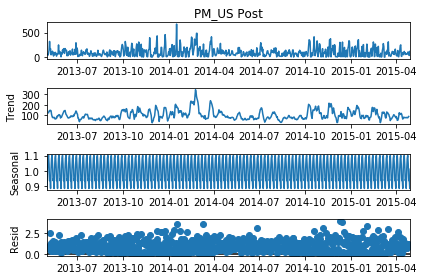

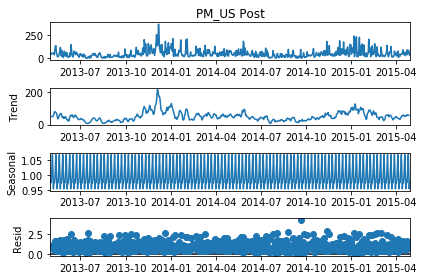

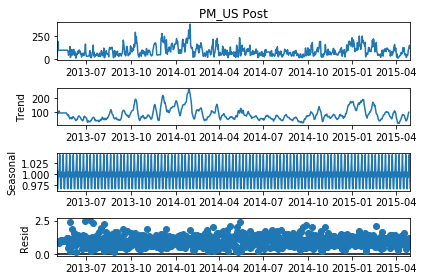

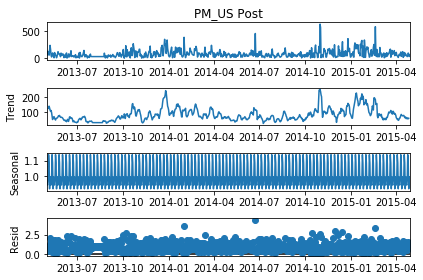

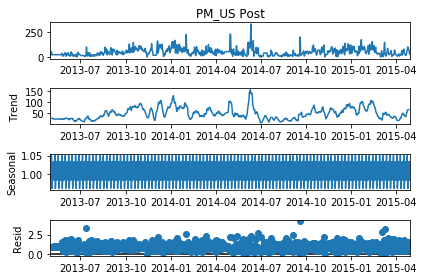

In [460]:
#for i in city_H:
#    split_result = seasonal_decompose(i['PM_US Post'], model = 'multiplicative')
    # ETS plot  
#    split_result.plot();

#monthly cycle
split_result = seasonal_decompose(Beijing_13['PM_US Post'],  
                            model ='multiplicative') 
split_result.plot();


split_result = seasonal_decompose(Shanghai_13['PM_US Post'],  
                            model ='multiplicative') 
split_result.plot();

split_result = seasonal_decompose(Chengdu_13['PM_US Post'],  
                            model ='multiplicative') 
split_result.plot();

split_result = seasonal_decompose(Shenyang_13['PM_US Post'],  
                            model ='multiplicative') 
split_result.plot();

split_result = seasonal_decompose(Guangzhou_13['PM_US Post'],  
                            model ='multiplicative') 
split_result.plot();


In [359]:
#frames = [data_13[['PM_US Post']], data_13_SH[['PM_US Post']]]
dataset_full = pd.merge(Beijing_13[['PM_US Post']], Shanghai_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)
dataset_full = pd.merge(dataset_full, Chengdu_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)
dataset_full = pd.merge(dataset_full, Shenyang_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)
dataset_full = pd.merge(dataset_full, Guangzhou_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)

In [360]:
dataset_full.columns = ["Beijing_PM2.5", "Shanghai_PM2.5", "Chengdu_PM2.5", "Shenyang_PM2.5", "Guangzhou_PM2.5"] #"Chengdu_PM2.5", "Guangzhou_PM2.5"
#dataset= dataset_full[0:365]
dataset = dataset_full
dataset


,Beijing_PM2.5,Shanghai_PM2.5,Chengdu_PM2.5,Shenyang_PM2.5,Guangzhou_PM2.5
Time,,,,,
2013-05-01 03:00:00,59.0,42.0,60.0,63.0,18.0
2013-05-02 03:00:00,57.0,40.0,28.0,133.0,24.0
2013-05-03 03:00:00,44.0,56.0,195.0,125.0,52.0
2013-05-04 03:00:00,83.0,51.0,96.0,103.0,24.0
2013-05-05 03:00:00,144.0,53.0,96.0,58.0,24.0
...,...,...,...,...,...
2015-04-26 03:00:00,107.0,51.0,94.0,98.0,96.0
2015-04-27 03:00:00,80.0,60.0,120.0,73.0,78.0
2015-04-28 03:00:00,35.0,49.0,148.0,33.0,47.0


In [361]:
# Split data into train / test sets 
train = dataset[:len(dataset)-146:] 
test = dataset[len(dataset)-146:]

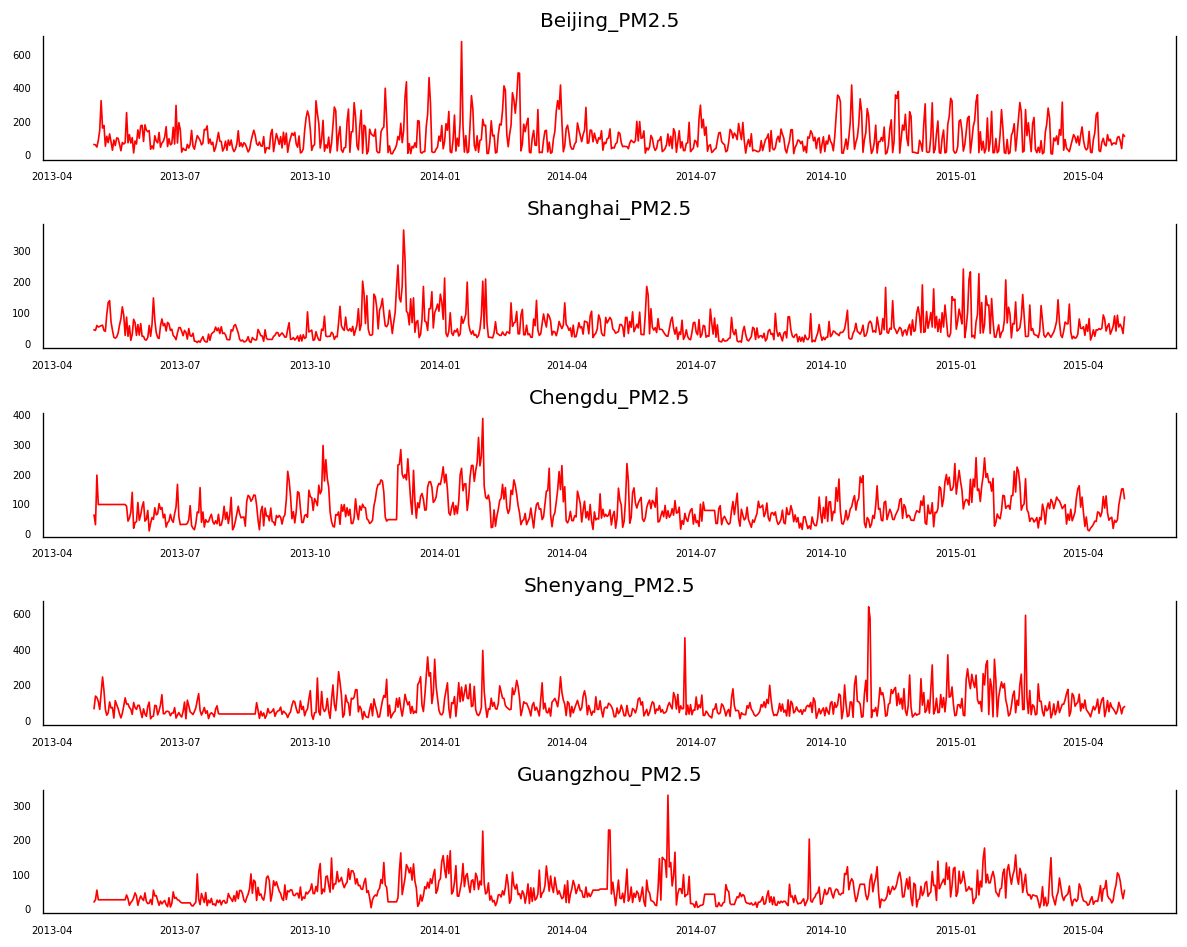

In [362]:
#preliminary plots of each variable
fig, axes = plt.subplots(nrows=len(dataset.columns), ncols=1, dpi=120, figsize=(10,8))
for i, ax in enumerate(axes.flatten()):
    data = dataset[dataset.columns[i]]
    ax.plot(data, color='red', linewidth=1)
    # Decorations
    ax.set_title(dataset.columns[i])
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

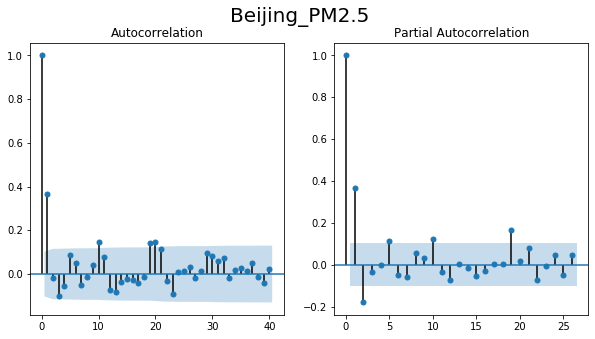

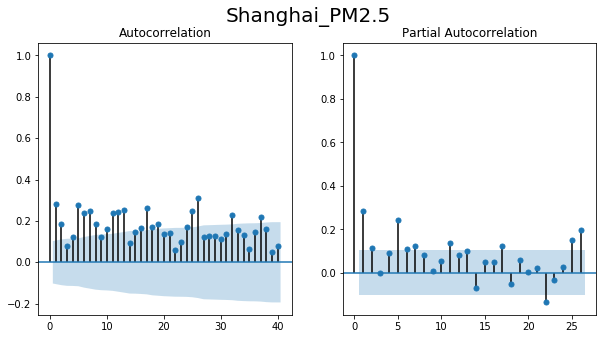

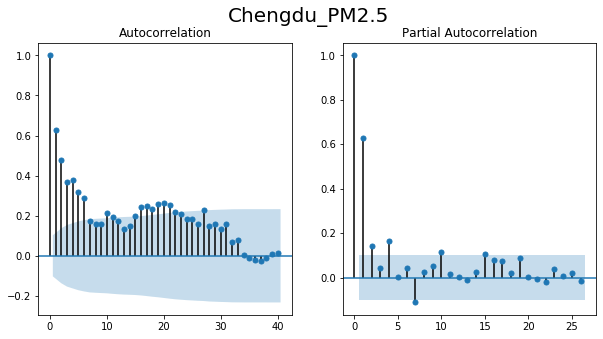

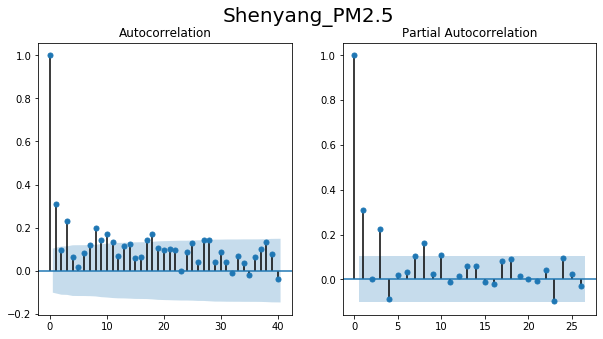

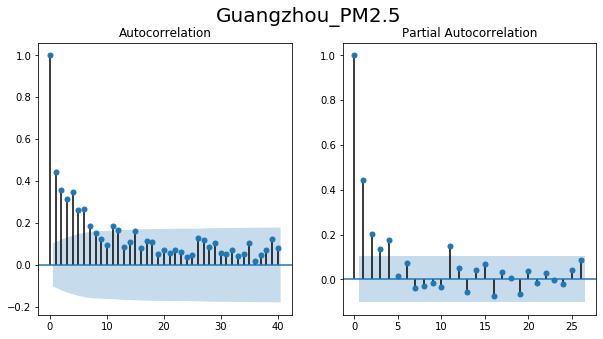

In [334]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Beijing_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Beijing_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Beijing_PM2.5'], ax = ax[1])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Shanghai_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Shanghai_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Shanghai_PM2.5'], ax = ax[1])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Chengdu_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Chengdu_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Chengdu_PM2.5'], ax = ax[1])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Shenyang_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Shenyang_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Shenyang_PM2.5'], ax = ax[1])

fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(10,5))
fig.suptitle('Guangzhou_PM2.5', fontsize=20)
ax[0] = plot_acf(dataset['Guangzhou_PM2.5'], ax = ax[0], lags = 40)
ax[1] = plot_pacf(dataset['Guangzhou_PM2.5'], ax = ax[1])

In [387]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=12
test = 'ssr_chi2test'
def grangers_causation_matrix(data, variables, test='ssr_chi2test', verbose=False):    
    """Check Granger Causality of all possible combinations of the Time series.
    The rows are the response variable, columns are predictors. The values in the table 
    are the P-Values. P-Values lesser than the significance level (0.05), implies 
    the Null Hypothesis that the coefficients of the corresponding past values is 
    zero, that is, the X does not cause Y can be rejected.

    data      : pandas dataframe containing the time series variables
    variables : list containing names of the time series variables.
    """
    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df

grangers_causation_matrix(dataset, variables = dataset.columns)     

,Beijing_PM2.5_x,Shanghai_PM2.5_x,Chengdu_PM2.5_x,Shenyang_PM2.5_x,Guangzhou_PM2.5_x
Beijing_PM2.5_y,1.0000,0.1580,0.001,0.0003,0.0036
Shanghai_PM2.5_y,0.0023,1.0000,0.000,0.0000,0.0050
Chengdu_PM2.5_y,0.1144,0.0001,1.000,0.2600,0.0879
Shenyang_PM2.5_y,0.5559,0.0030,0.000,1.0000,0.0000
Guangzhou_PM2.5_y,0.0057,0.0000,0.000,0.0195,1.0000


In [ ]:
from statsmodels.tsa.vector_ar.vecm import coint_johansen

def cointegration_test(df, alpha=0.05): 
    """Perform Johanson's Cointegration Test and Report Summary"""
    out = coint_johansen(df,-1,5)
    d = {'0.90':0, '0.95':1, '0.99':2}
    traces = out.lr1
    cvts = out.cvt[:, d[str(1-alpha)]]
    def adjust(val, length= 6): return str(val).ljust(length)

    # Summary
    print('Name   ::  Test Stat > C(95%)    =>   Signif  \n', '--'*20)
    for col, trace, cvt in zip(df.columns, traces, cvts):
        print(adjust(col), ':: ', adjust(round(trace,2), 9), ">", adjust(cvt, 8), ' =>  ' , trace > cvt)

cointegration_test(dataset)

In [363]:
def adfuller_test(series, signif=0.05, name='', verbose=False):
    """Perform ADFuller to test for Stationarity of given series and print report"""
    r = adfuller(series, autolag='AIC')
    output = {'test_statistic':round(r[0], 4), 'pvalue':round(r[1], 4), 'n_lags':round(r[2], 4), 'n_obs':r[3]}
    p_value = output['pvalue'] 
    def adjust(val, length= 6): return str(val).ljust(length)

    # Print Summary
    print(f'    Augmented Dickey-Fuller Test on "{name}"', "\n   ", '-'*47)
    #print(f' Null Hypothesis: Data has unit root. Non-Stationary.')
    #print(f' Significance Level    = {signif}')
    #print(f' Test Statistic        = {output["test_statistic"]}')
    #print(f' No. Lags Chosen       = {output["n_lags"]}')

    #for key,val in r[4].items():
    #    print(f' Critical value {adjust(key)} = {round(val, 3)}')

    if p_value <= signif:
        #print(f" => P-Value = {p_value}. Rejecting Null Hypothesis.")
        print(f" => Series is Stationary.")
    else:
        #print(f" => P-Value = {p_value}. Weak evidence to reject the Null Hypothesis.")
        print(f" => Series is Non-Stationary.") 
          
# ADF Test on each column
for name, column in train.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

    Augmented Dickey-Fuller Test on "Beijing_PM2.5" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Shanghai_PM2.5" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Chengdu_PM2.5" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Shenyang_PM2.5" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Guangzhou_PM2.5" 
    -----------------------------------------------
 => Series is Stationary.




In [370]:
train_diff = train.diff().dropna()

In [371]:
train_diff

,Beijing_PM2.5,Shanghai_PM2.5,Chengdu_PM2.5,Shenyang_PM2.5,Guangzhou_PM2.5
Time,,,,,
2013-05-02 03:00:00,-2.0,-2.0,-32.0,70.0,6.0
2013-05-03 03:00:00,-13.0,16.0,167.0,-8.0,28.0
2013-05-04 03:00:00,39.0,-5.0,-99.0,-22.0,-28.0
2013-05-05 03:00:00,61.0,2.0,0.0,-45.0,0.0
2013-05-06 03:00:00,176.0,2.0,0.0,95.0,0.0
...,...,...,...,...,...
2014-12-01 03:00:00,-214.0,49.0,0.0,-55.0,-23.0
2014-12-02 03:00:00,0.0,-37.0,-1.0,10.0,65.0
2014-12-03 03:00:00,-2.0,3.0,20.0,12.0,-5.0


In [372]:
from statsmodels.tsa.api import VAR
model = VAR(train_diff)
#for i in [1,2,3,4,5,7,8,9,10,11,12,13,14,15]:
#    result = model.fit(i)
#    print('Lag Order =', i)
#    print('AIC : ', result.aic)
#    print('BIC : ', result.bic)
#    print('FPE : ', result.fpe)
#    print('HQIC: ', result.hqic, '\n')
    
x = model.select_order(maxlags=50)
x.summary()
#min AIC/FPE: lag 2

,AIC,BIC,FPE,HQIC
0,39.96,40.00,2.271e+17,39.98
1,39.51,39.75,1.440e+17,39.60
2,39.22,39.67*,1.083e+17,39.40
3,39.03,39.67,8.935e+16,39.28*
4,38.95,39.80,8.262e+16,39.28
5,38.93,39.98,8.104e+16,39.34
6,38.89,40.13,7.768e+16,39.38
7,38.91,40.35,7.898e+16,39.47
8,38.87,40.52,7.616e+16,39.51
9,38.84,40.69,7.423e+16,39.57


In [373]:
results = model.fit(maxlags=20, ic='aic')
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Thu, 23, Apr, 2020
Time:                     16:42:28
--------------------------------------------------------------------
No. of Equations:         5.00000    BIC:                    40.7155
Nobs:                     572.000    HQIC:                   39.4170
Log likelihood:          -14813.9    FPE:                5.74483e+16
AIC:                      38.5865    Det(Omega_mle):     3.60130e+16
--------------------------------------------------------------------
Results for equation Beijing_PM2.5
                         coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------------------
const                      -0.381238         3.393364           -0.112           0.911
L1.Beijing_PM2.5           -0.504080         0.045662          -11.039           0.000
L1.Shanghai_PM2.5           

In [374]:
#Check for Serial Correlation of Residuals (Errors) using Durbin Watson Statistic: [0,4]; 
#close to 2 = no significant serial correlation
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(results.resid)

def adjust(val, length= 6): return str(val).ljust(length)
for col, val in zip(train.columns, out):
    print(adjust(col), ':', round(val, 2))

Beijing_PM2.5 : 2.0
Shanghai_PM2.5 : 1.99
Chengdu_PM2.5 : 2.0
Shenyang_PM2.5 : 1.99
Guangzhou_PM2.5 : 1.99


In [434]:
test = dataset[len(dataset)-146:]


In [427]:
# Get the lag order
lag_order = results.k_ar
#print(lag_order)

# Input data for forecasting
forecast_input = train_diff.values[-lag_order:]

#results.forecast(dataset.values[-lag_order:], 10)
fc = results.forecast(y=forecast_input, steps=15)
result_forecast = pd.DataFrame(fc, index=dataset.index[-15:], columns=dataset.columns + '_forecast')
#print(result_forecast)
fc_future  = pd.DataFrame(fc, index = test.diff().index[0:15], columns=test.columns + '_forecast')

#print(dataset.iloc[-10:])

AttributeError: 'str' object has no attribute 'diff'

In [428]:
def invert_transformation(train, result_forecast):
    """Revert back the differencing to get the forecast to original scale."""
    df_fc = result_forecast.copy()
    columns = train.columns
    for col in columns:        
        # Roll back 1st Diff
        df_fc[str(col)+'_forecast'] = train[col].iloc[-1] + df_fc[str(col)+ '_forecast'].cumsum()
    return df_fc
df_forecast = invert_transformation(train, result_forecast)   

df_future_result = invert_transformation(train, fc_future)
print(df_forecast.loc[:, ['Beijing_PM2.5_forecast','Shanghai_PM2.5_forecast', 'Chengdu_PM2.5_forecast', 'Shenyang_PM2.5_forecast', 'Guangzhou_PM2.5_forecast']])

                     Beijing_PM2.5_forecast  Shanghai_PM2.5_forecast  \
Time                                                                   
2015-04-16 03:00:00               74.292570                69.181223   
2015-04-17 03:00:00              110.477055                55.254088   
2015-04-18 03:00:00               67.223813                57.713306   
2015-04-19 03:00:00              100.745548                73.938346   
2015-04-20 03:00:00              114.921725                69.782886   
2015-04-21 03:00:00               53.889186                69.716308   
2015-04-22 03:00:00               50.491692                68.952211   
2015-04-23 03:00:00               66.812653                65.409650   
2015-04-24 03:00:00               34.079967                68.846600   
2015-04-25 03:00:00               34.693045                75.894937   
2015-04-26 03:00:00               76.445877                73.830233   
2015-04-27 03:00:00               86.698979                66.31

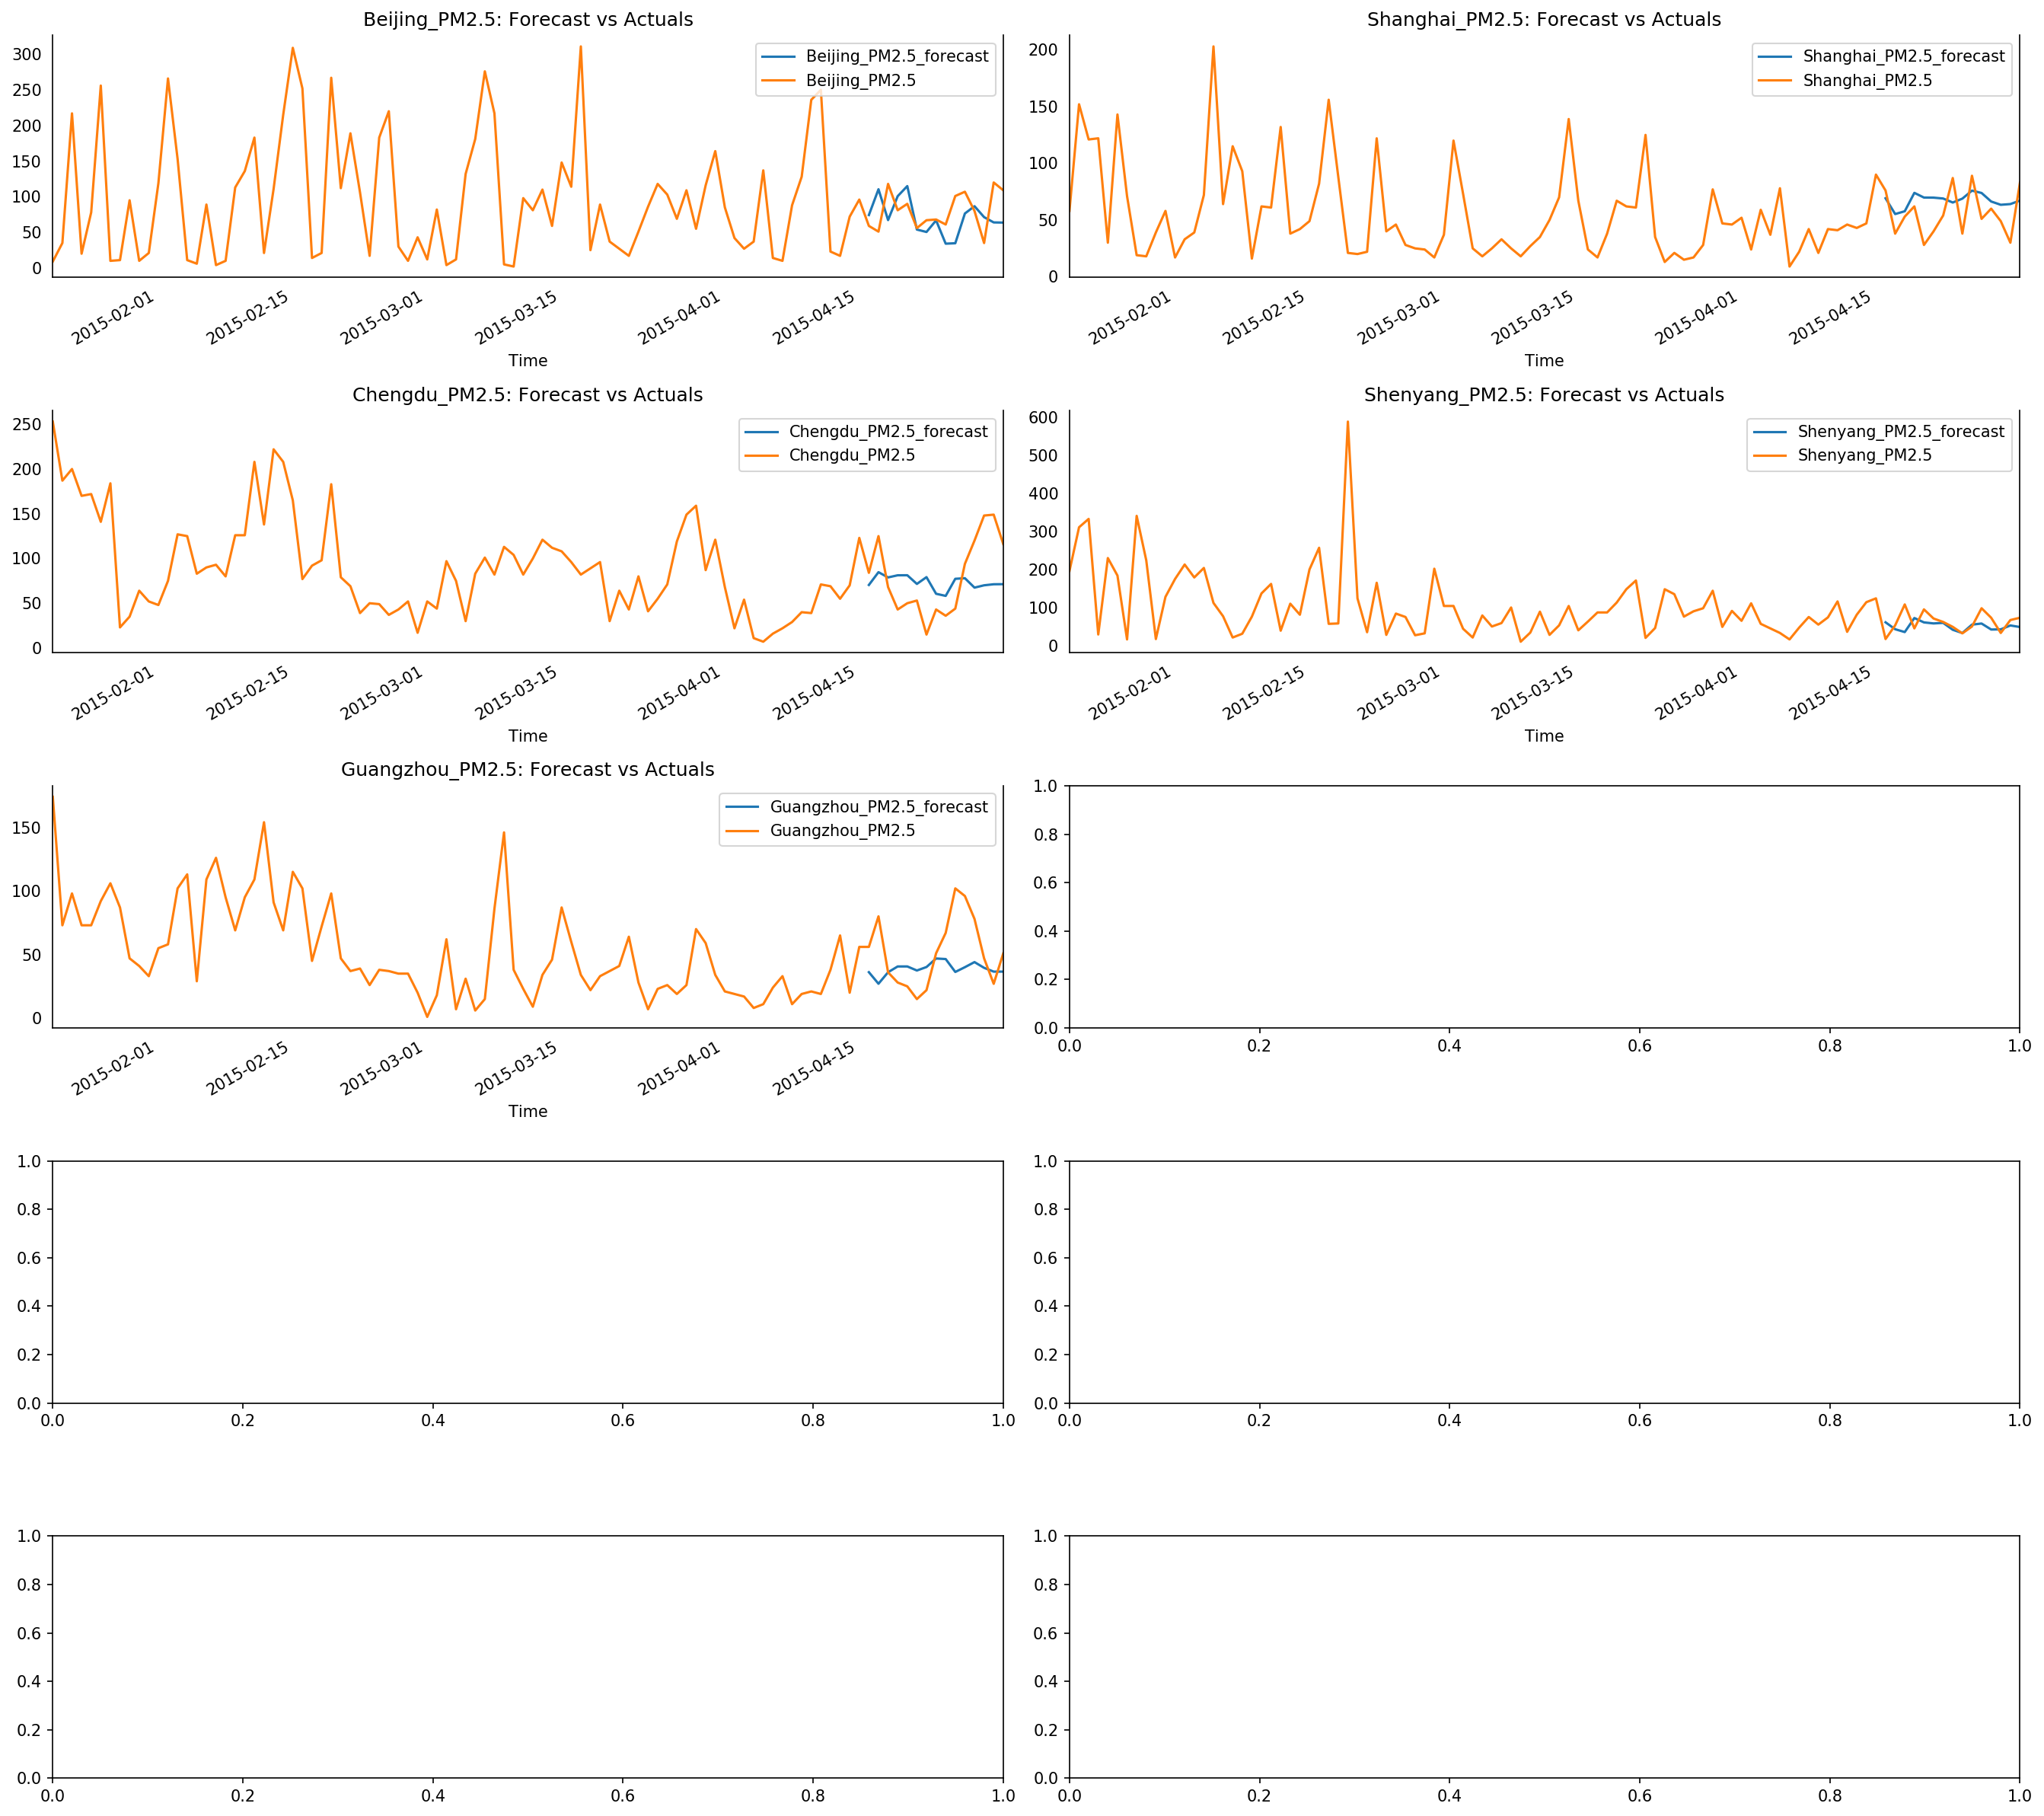

In [429]:
fig, axes = plt.subplots(nrows=int(len(dataset.columns)), ncols=2, dpi=150, figsize=(18,16))
for i, (col,ax) in enumerate(zip(dataset.columns, axes.flatten())):
    df_forecast[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    dataset[col][-100:].plot(legend=True, ax=ax);
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout();

In [435]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test[['Beijing_PM2.5', 'Shanghai_PM2.5', 'Chengdu_PM2.5', 'Shenyang_PM2.5', 'Guangzhou_PM2.5']][-15:], 
                                  df_forecast[['Beijing_PM2.5_forecast', 'Shanghai_PM2.5_forecast', 'Chengdu_PM2.5_forecast', 'Shenyang_PM2.5_forecast', 'Guangzhou_PM2.5_forecast']][-15:]))
print("Overall RMSE: ", rmse)

Overall RMSE:  33.07454515977008


In [436]:
rmse_BJ = np.sqrt(mean_squared_error(test[['Beijing_PM2.5']][-15:], 
                                  df_forecast[['Beijing_PM2.5_forecast']][-15:]))
print("RMSE for Beijing_PM2.5: ", rmse_BJ)

rmse_SH = np.sqrt(mean_squared_error(test[['Shanghai_PM2.5']][-15:], 
                                  df_forecast[['Shanghai_PM2.5_forecast']][-15:]))
print("RMSE for Shanghai_PM2.5: ", rmse_SH)

rmse_CD = np.sqrt(mean_squared_error(test[['Chengdu_PM2.5']][-15:], 
                                  df_forecast[['Chengdu_PM2.5_forecast']][-15:]))
print("RMSE for Chengdu_PM2.5: ", rmse_CD)

rmse_SY = np.sqrt(mean_squared_error(test[['Shenyang_PM2.5']][-15:], 
                                  df_forecast[['Shenyang_PM2.5_forecast']][-15:]))
print("RMSE for Shenyang_PM2.5: ", rmse_SY)

rmse_GZ = np.sqrt(mean_squared_error(test[['Guangzhou_PM2.5']][-15:], 
                                  df_forecast[['Guangzhou_PM2.5_forecast']][-15:]))
print("RMSE for Guangzhou_PM2.5: ", rmse_GZ)

RMSE for Beijing_PM2.5:  36.74812810709898
RMSE for Shanghai_PM2.5:  21.802841538126597
RMSE for Chengdu_PM2.5:  43.11447066959918
RMSE for Shenyang_PM2.5:  29.379463855139758
RMSE for Guangzhou_PM2.5:  30.361626958724493


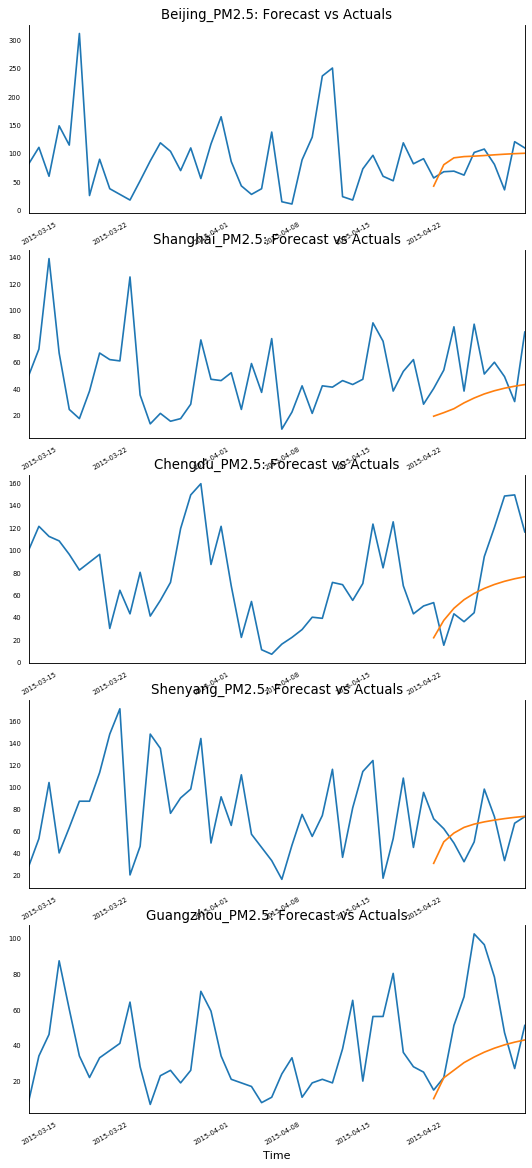

In [369]:
#results.plot_forecast(50, plot_stderr= False); #Cannot enlarge/change the figsize
#dataset_diff = dataset.diff().dropna()
fig, axes = plt.subplots(nrows=int(len(dataset.columns)), ncols=1, dpi=80, figsize=(8,20))
for i, (col,ax) in enumerate(zip(dataset.columns, axes.flatten())):
    dataset[col][-50:].plot(legend=False, ax=ax).autoscale(axis='x',tight=True)
    result_forecast[col+'_forecast'].plot(legend=False, ax=ax).autoscale(axis='x',tight=True)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

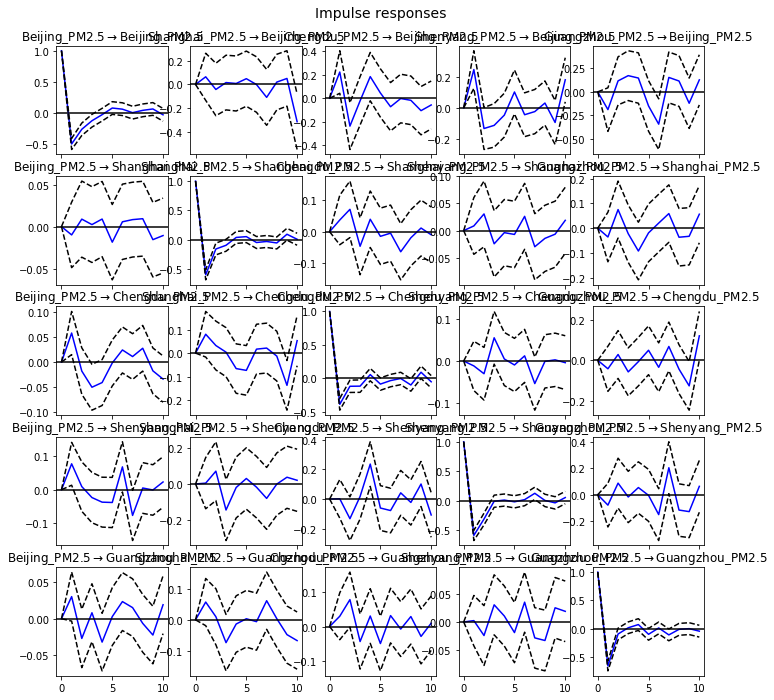

In [386]:
#impulse response analysis
irf = results.irf(10)
irf.plot(orth=False);

In [ ]:
#impulse response analysis wiht cumulative effect
irf.plot_cum_effects(orth=False);

In [ ]:
resid = results.resid
fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(111)
qqplot(resid, line='q', ax=ax, fit=True)
plt.show()

In [ ]:
#Forecast Error Variance Decomposition (FEVD) method
fevd = results.fevd(5)
fevd.summary()

In [467]:
dataset2 = pd.merge(Beijing_13[['PM_US Post']], Shanghai_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)
dataset2.columns = ["Beijing_PM2.5_w/Shanghai", "Shanghai_PM2.5"]

dataset3 = pd.merge(Chengdu_13[['PM_US Post']], Beijing_13[['PM_US Post']] , how = 'left', left_index=True, right_index=True)
dataset3.columns = ["Chengdu_PM2.5_w/Beijing", "Beijing_PM2.5"] 

dataset4 = pd.merge(Shenyang_13[['PM_US Post']], Beijing_13[['PM_US Post']], how = 'left', left_index=True, right_index=True)
dataset4.columns = ["Shenyang_PM2.5_w/Beijing", "Beijing_PM2.5"]
                        

In [496]:
train2 = dataset2[:len(dataset)-146]
test2 = dataset2[len(dataset)-146:]
# ADF Test on each column
for name, column in train2.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

train2_diff = train2.diff().dropna()
train2_diff

model2 = VAR(train2_diff)
    
#x2 = model2.select_order(maxlags=20)
#x2.summary()

results2 = model2.fit(maxlags=30, ic='aic')
#results3.summary()

lag_order2 = results2.k_ar
#print(lag_order)

# Input data for forecasting
forecast_input2 = train2_diff.values[-lag_order2:]

#results.forecast(dataset.values[-lag_order:], 20)
fc2 = results2.forecast(y=forecast_input2, steps=15)
result_forecast2 = pd.DataFrame(fc2, index=dataset2.index[-15:], columns=dataset2.columns + '_forecast')
#print(result_forecast)

df_results2 = invert_transformation(train2, result_forecast2)  

    Augmented Dickey-Fuller Test on "Beijing_PM2.5_w/Shanghai" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Shanghai_PM2.5" 
    -----------------------------------------------
 => Series is Stationary.




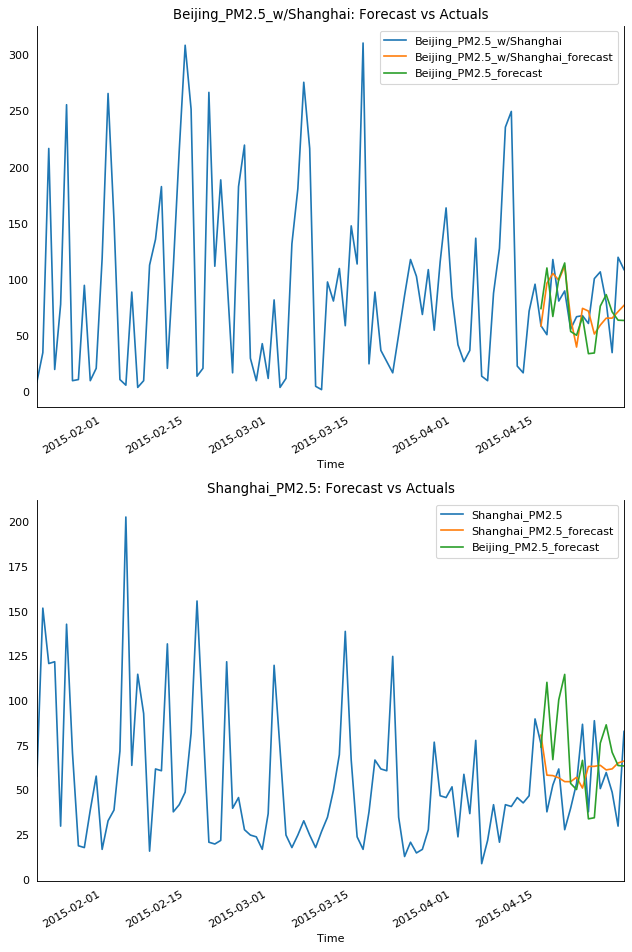

In [499]:
#results2.plot_forecast(150, plot_stderr= False);
fig, axes = plt.subplots(nrows=int(len(dataset2.columns)), ncols=1, dpi=80, figsize=(8,12))
for i, (col,ax) in enumerate(zip(dataset2.columns, axes.flatten())):
    dataset2[col][-100:].plot(legend=True, ax=ax);
    df_results2[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_forecast['Beijing_PM2.5_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)

    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=10)

plt.tight_layout();

In [498]:
rmse_BJSH = np.sqrt(mean_squared_error(test2[['Beijing_PM2.5_w/Shanghai', 'Shanghai_PM2.5']][-15:], 
                                  df_results2[['Beijing_PM2.5_w/Shanghai_forecast', 'Shanghai_PM2.5_forecast']][-15:]))
print("Overall RMSE: ", rmse_BJSH)

rmse_BJSH_BJ = np.sqrt(mean_squared_error(test2[['Beijing_PM2.5_w/Shanghai']][-15:], 
                                  df_results2[['Beijing_PM2.5_w/Shanghai_forecast']][-15:]))
print("RMSE for Beijing_PM2.5: ", rmse_BJSH_BJ)

rmse_BJSH_SH = np.sqrt(mean_squared_error(test2[['Shanghai_PM2.5']][-15:], 
                                  df_results2[['Shanghai_PM2.5_forecast']][-15:]))
print("RMSE for Shanghai_PM2.5: ", rmse_BJSH_SH)


Overall RMSE:  25.284691111096112
RMSE for Beijing_PM2.5:  29.76435080851836
RMSE for Shanghai_PM2.5:  19.817028791282972


In [473]:
train3 = dataset3[:len(dataset)-146]
test3 = dataset3[len(dataset)-146:]
# ADF Test on each column
for name, column in train3.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

train3_diff = train3.diff().dropna()
train3_diff

model3 = VAR(train3_diff)
    
#x3 = model3.select_order(maxlags=30)
#x3.summary()

results3 = model3.fit(maxlags=30, ic='aic')
#results3.summary()

lag_order3 = results3.k_ar
#print(lag_order)

# Input data for forecasting
forecast_input3 = train3_diff.values[-lag_order3:]

#results.forecast(dataset.values[-lag_order:], 30)
fc3 = results3.forecast(y=forecast_input3, steps=15)
result_forecast3 = pd.DataFrame(fc3, index=dataset3.index[-15:], columns=dataset3.columns + '_forecast')
#print(result_forecast)

df_results3 = invert_transformation(train3, result_forecast3)  

    Augmented Dickey-Fuller Test on "Chengdu_PM2.5_w/Beijing" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Beijing_PM2.5" 
    -----------------------------------------------
 => Series is Stationary.




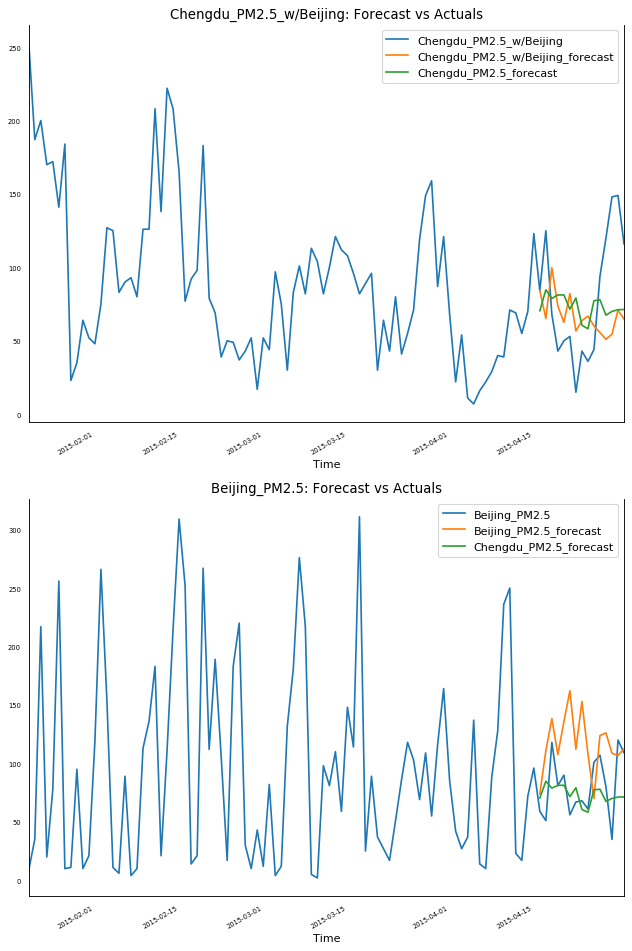

In [474]:
#results3.plot_forecast(150, plot_stderr= False);
fig, axes = plt.subplots(nrows=int(len(dataset3.columns)), ncols=1, dpi=80, figsize=(8,12))
for i, (col,ax) in enumerate(zip(dataset3.columns, axes.flatten())):
    dataset3[col][-100:].plot(legend=True, ax=ax);
    df_results3[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_forecast['Chengdu_PM2.5_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [475]:
rmse_CDBJ = np.sqrt(mean_squared_error(test3[['Chengdu_PM2.5_w/Beijing', 'Beijing_PM2.5']][-15:], 
                                  df_results3[['Chengdu_PM2.5_w/Beijing_forecast', 'Beijing_PM2.5_forecast']][-15:]))
print("Overall RMSE: ", rmse_CDBJ)

rmse_CDBJ_CD = np.sqrt(mean_squared_error(test3[['Chengdu_PM2.5_w/Beijing']][-15:], 
                                  df_results3[['Chengdu_PM2.5_w/Beijing_forecast']][-15:]))
print("RMSE for Chengdu_PM2.5: ", rmse_CDBJ_CD)

rmse_CDBJ_BJ = np.sqrt(mean_squared_error(test3[['Beijing_PM2.5']][-15:], 
                                  df_results3[['Beijing_PM2.5_forecast']][-15:]))
print("RMSE for Beijing_PM2.5: ", rmse_CDBJ_BJ)


Overall RMSE:  49.0987021397376
RMSE for Chengdu_PM2.5:  47.3398042284243
RMSE for Beijing_PM2.5:  50.79673256448497


In [476]:
train4 = dataset4[:len(dataset)-146]
test4 = dataset4[len(dataset)-146:]
# ADF Test on each column
for name, column in train4.iteritems():
    adfuller_test(column, name=column.name)
    print('\n')

train4_diff = train4.diff().dropna()
train4_diff

model4 = VAR(train4_diff)
    
#x4 = model4.select_order(maxlags=40)
#x4.summary()

results4 = model4.fit(maxlags=30, ic='aic')
#results3.summary()

lag_order4 = results4.k_ar
#print(lag_order)

# Input data for forecasting
forecast_input4 = train4_diff.values[-lag_order4:]

#results.forecast(dataset.values[-lag_order:], 40)
fc4 = results4.forecast(y=forecast_input4, steps=15)
result_forecast4 = pd.DataFrame(fc4, index=dataset4.index[-15:], columns=dataset4.columns + '_forecast')
#print(result_forecast)

df_results4 = invert_transformation(train4, result_forecast4)  

    Augmented Dickey-Fuller Test on "Shenyang_PM2.5_w/Beijing" 
    -----------------------------------------------
 => Series is Stationary.


    Augmented Dickey-Fuller Test on "Beijing_PM2.5" 
    -----------------------------------------------
 => Series is Stationary.




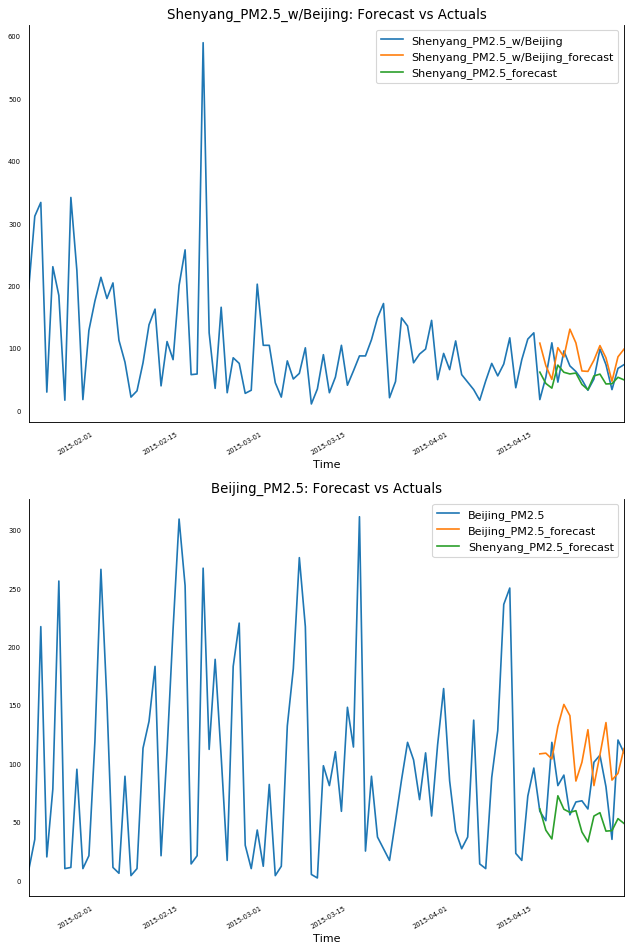

In [478]:
#results4.plot_forecast(150, plot_stderr= False);
fig, axes = plt.subplots(nrows=int(len(dataset4.columns)), ncols=1, dpi=80, figsize=(8,12))
for i, (col,ax) in enumerate(zip(dataset4.columns, axes.flatten())):
    dataset4[col][-100:].plot(legend=True, ax=ax);
    df_results4[col+'_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    df_forecast['Shenyang_PM2.5_forecast'].plot(legend=True, ax=ax).autoscale(axis='x',tight=True)
    ax.set_title(col + ": Forecast vs Actuals")
    ax.xaxis.set_ticks_position('none')
    ax.yaxis.set_ticks_position('none')
    ax.spines["top"].set_alpha(0)
    ax.tick_params(labelsize=6)

plt.tight_layout();

In [479]:
rmse_SYBJ = np.sqrt(mean_squared_error(test4[['Shenyang_PM2.5_w/Beijing', 'Beijing_PM2.5']][-15:], 
                                  df_results4[['Shenyang_PM2.5_w/Beijing_forecast', 'Beijing_PM2.5_forecast']][-15:]))
print("Overall RMSE: ", rmse_SYBJ)

rmse_SYBJ_SY = np.sqrt(mean_squared_error(test4[['Shenyang_PM2.5_w/Beijing']][-15:], 
                                  df_results4[['Shenyang_PM2.5_w/Beijing_forecast']][-15:]))
print("RMSE for Shenyang_PM2.5: ", rmse_SYBJ_SY)

rmse_SYBJ_BJ = np.sqrt(mean_squared_error(test4[['Beijing_PM2.5']][-15:], 
                                  df_results4[['Beijing_PM2.5_forecast']][-15:]))
print("RMSE for Beijing_PM2.5: ", rmse_SYBJ_BJ)

Overall RMSE:  43.26581745659568
RMSE for Shenyang_PM2.5:  39.97875138713305
RMSE for Beijing_PM2.5:  46.32020464009984


In [480]:
print("RMSE for Beijing_PM2.5_forecast (All) : ", rmse_BJ)
print("RMSE for Beijing_PM2.5_forecast (w/ Shanghai): ", rmse_BJSH_BJ)
print("RMSE for Chengdu_PM2.5_forecast (All) : ", rmse_CD)
print("RMSE for Chengdu_PM2.5_forecast (w/ Beijing) : ", rmse_CDBJ_CD)
print("RMSE for Shenyang_PM2.5_forecast (All) : ", rmse_SY)
print("RMSE for Shenyang_PM2.5_forecast (w/ Beijing) : ", rmse_SYBJ_SY)


RMSE for Beijing_PM2.5_forecast (All) :  36.74812810709898
RMSE for Beijing_PM2.5_forecast (w/ Shanghai):  29.76435080851836
RMSE for Chengdu_PM2.5_forecast (All) :  43.11447066959918
RMSE for Chengdu_PM2.5_forecast (w/ Beijing) :  47.3398042284243
RMSE for Shenyang_PM2.5_forecast (All) :  29.379463855139758
RMSE for Shenyang_PM2.5_forecast (w/ Beijing) :  39.97875138713305
